In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [24]:
print("Customers Dataset:")
print(customers.head(), "\n")

print("Products Dataset:")
print(products.head(), "\n")

print("Transactions Dataset:")
print(transactions.head(), "\n")

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166 

In [25]:
print("Missing Values:\n")
print("Customers:\n", customers.isnull().sum(), "\n")
print("Products:\n", products.isnull().sum(), "\n")
print("Transactions:\n", transactions.isnull().sum(), "\n")

Missing Values:

Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



In [26]:
print("Summary Statistics:\n")
print("Transactions:\n", transactions.describe(), "\n")

Summary Statistics:

Transactions:
           Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000 



In [41]:
merged_data = pd.merge(transactions, customers, on="CustomerID", how="left")
merged_data = pd.merge(merged_data, products, on="ProductID", how="left")

In [28]:
category_sales = merged_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
print("Total Sales by Category:\n", category_sales, "\n")

Total Sales by Category:
 Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64 



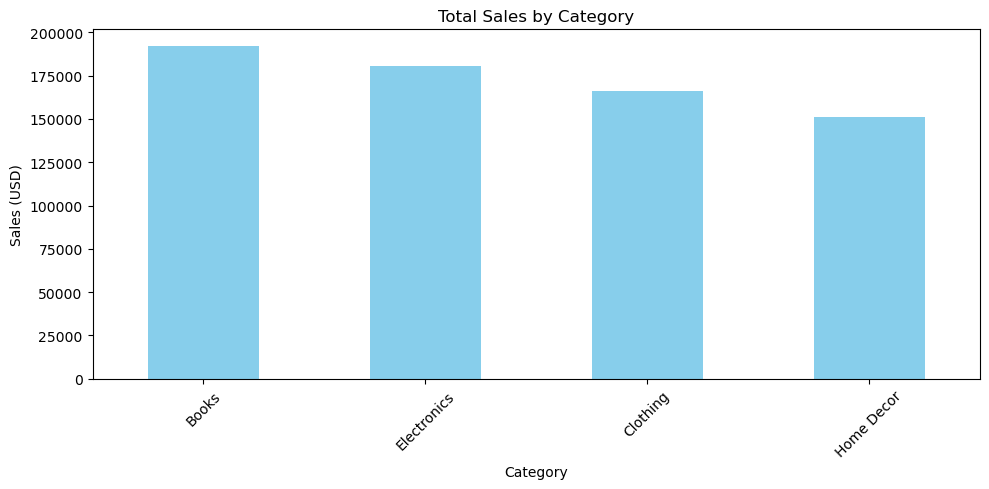

In [47]:
plt.figure(figsize=(10, 5))
category_sales.plot(kind='bar', color='skyblue')
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
region_sales = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print("Total Sales by Region:\n", region_sales, "\n")

Total Sales by Region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64 



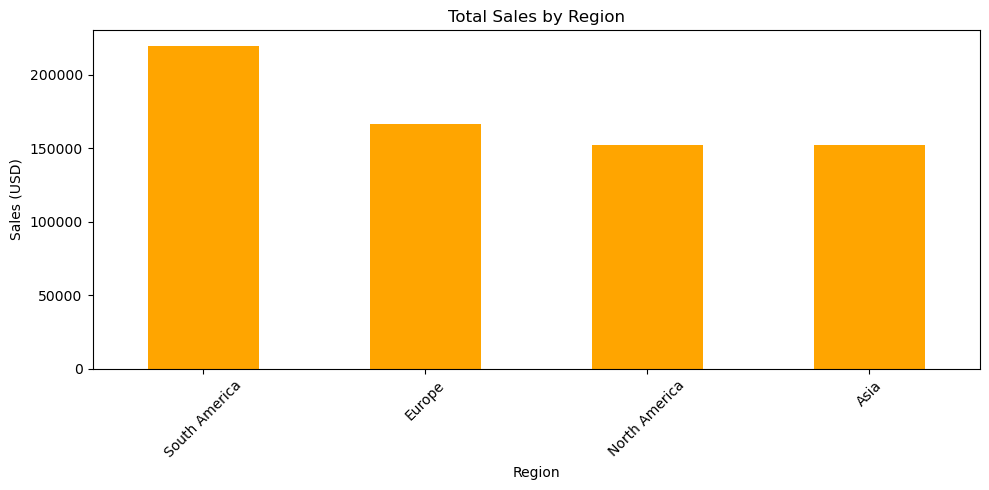

In [46]:
plt.figure(figsize=(10, 5))
region_sales.plot(kind='bar', color='orange')
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
top_customers = merged_data.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers:\n", top_customers, "\n")

Top 10 Customers:
 CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eaton             6715.72
Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64 



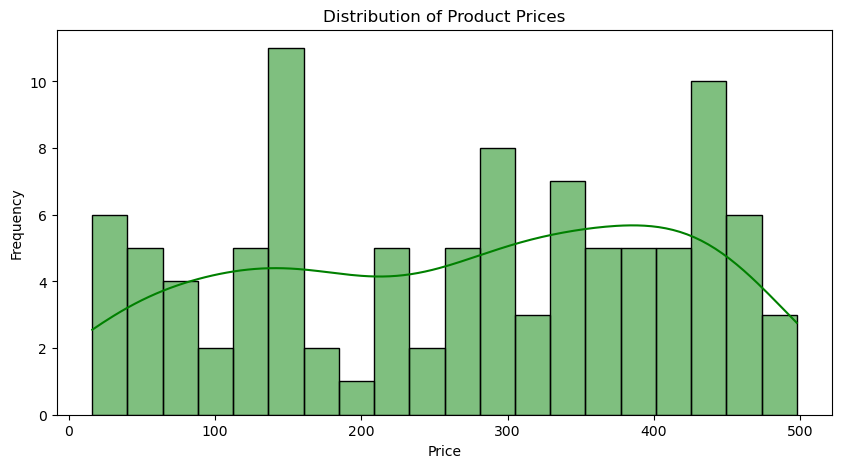

In [45]:
plt.figure(figsize=(10, 5))
sns.histplot(products['Price'], kde=True, color='green', bins=20)
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

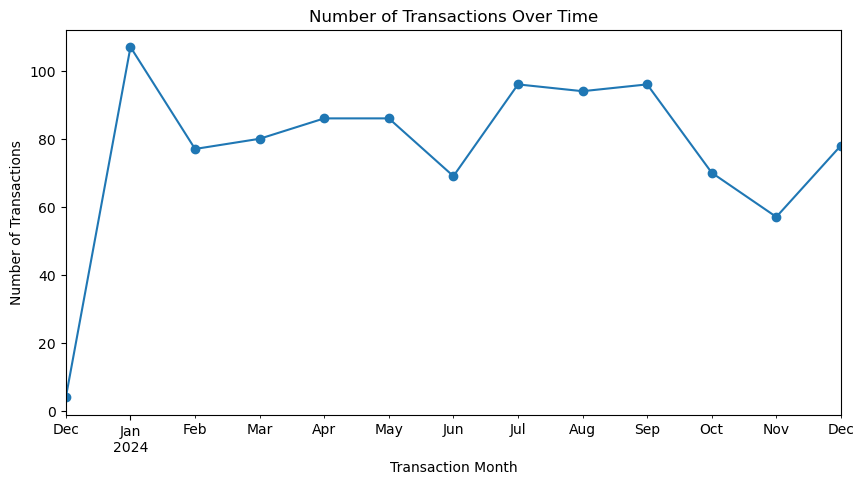

In [50]:
plt.figure(figsize=(10, 5))
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])
merged_data["TransactionDate"].dt.to_period('M').value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Number of Transactions Over Time")
plt.xlabel("Transaction Month")
plt.ylabel("Number of Transactions")
plt.show()

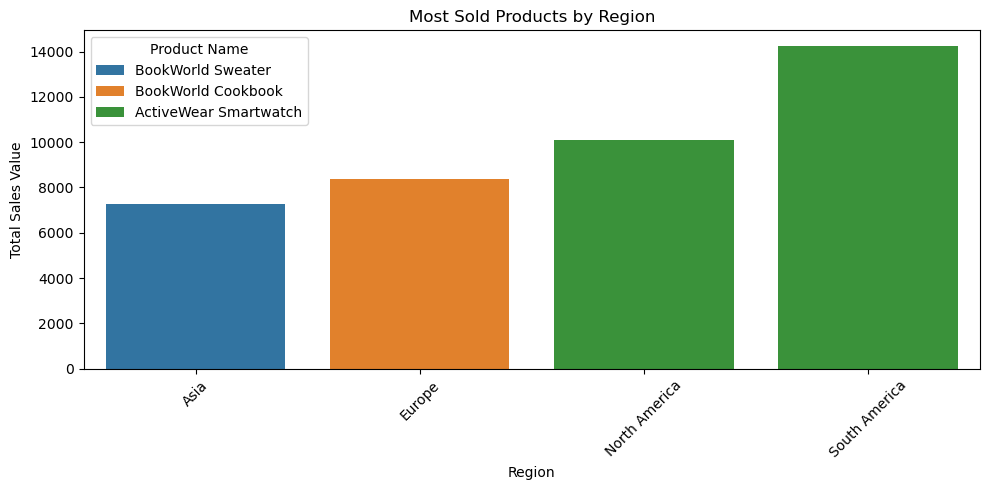

In [49]:
region_product_sales = merged_data.groupby(['Region', 'ProductName'])['TotalValue'].sum().reset_index()

most_sold_products_by_region = region_product_sales.loc[region_product_sales.groupby('Region')['TotalValue'].idxmax()]

plt.figure(figsize=(10, 5))
sns.barplot(data=most_sold_products_by_region, x='Region', y='TotalValue', hue='ProductName', dodge=False)
plt.title('Most Sold Products by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Value')
plt.legend(title='Product Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()